<a href="https://colab.research.google.com/github/kenrickraymond/MachineLearning-Models/blob/main/MRNA_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install yfinance

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import *
import pandas as pd
import yfinance as yf

In [28]:
tickers_list = ['MRNA']
start = '2020-01-1'
end = '2021-04-1'

dataset_train = yf.download(tickers_list, start, end)
prices.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-10,74.269997,75.000000,71.410004,72.010002,72.010002,8678300
2020-08-11,69.519997,71.400002,67.000000,68.970001,68.970001,18118700
2020-08-12,75.669998,75.750000,68.300003,69.519997,69.519997,50362100
2020-08-13,69.089996,69.180000,67.050003,67.830002,67.830002,15055900
2020-08-14,68.059998,70.360001,67.860001,69.150002,69.150002,12799600


In [29]:
# type(prices)
training_set = dataset_train.iloc[:, 1:2].values

In [30]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [31]:
X_train = []
y_train = []
for i in range(60, len(prices.index)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [33]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
6/6 [==============================] - 4s 19ms/step - loss: 0.0753
Epoch 2/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0258
Epoch 3/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0239
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0197
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0171
Epoch 6/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0184
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0156
Epoch 8/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0147
Epoch 9/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0162
Epoch 10/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0147
Epoch 11/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0124
Epoch 12/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0138
Epoch 13/100
6/6 [==============================]

In [54]:
tickers_list = ['MRNA']
start = '2021-04-02'
end = '2021-08-21'

dataset_test = yf.download(tickers_list, start, end)
real_stock_price = dataset_test.iloc[:, 1:2].values

# len(real_stock_price)

[*********************100%***********************]  1 of 1 completed


98

In [55]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 60+98):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

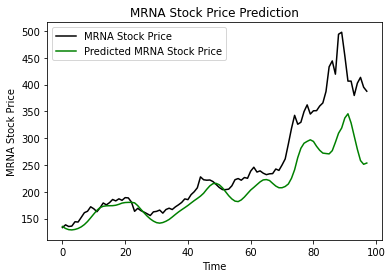

In [58]:
plt.plot(real_stock_price, color = 'black', label = 'MRNA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted MRNA Stock Price')
plt.title('MRNA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('MRNA Stock Price')
plt.legend()
plt.show()